<a href="https://colab.research.google.com/github/Gauravchauhan764/Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics/blob/main/Applied_Statistics_Mid_Course_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Purchase Behavior Analysis using Descriptive Statistics**


**Problem Statement**


🔍 Problem Statement:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 Objective:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

**Data Description**

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

YearBirth - Age of the customer Complain - 1 if the customer complained in the last 2 years

DtCustomer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website

NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase


**Summary**

The project aims to leverage descriptive statistics to analyze customer purchase behavior. The dataset encompasses various customer attributes like age, education, marital status, and spending habits. The primary tasks involve dataset cleanup, statistical analysis, identifying probability distributions, exploring relationships between variables, segmenting customers based on behavior, and providing actionable recommendations for the company.

Initially, the dataset will be cleaned, handling missing values and ensuring consistent data types. Descriptive statistics will be employed to comprehend customer demographics, showcasing measures like mean, median, variance, and standard deviation for relevant numerical variables. Moreover, measures of central tendency and dispersion will be calculated for key variables, while outliers will be addressed if detected.

Probability distributions will be determined for applicable variables, and corresponding probabilities and expected values will be calculated. Furthermore, the project aims to uncover relationships between customer attributes and spending habits, leading to customer segmentation based on behaviors. The insights gained from these analyses will be used to create visualizations that will aid in making actionable recommendations for the company.

# **GitHub Link -**








### Import Libraries

In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

In [73]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier)

# To get different metric scores and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score)

In [74]:
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [75]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/Superstore Marketing Data - Sheet1.csv")

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Information

In [77]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.000,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.000,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [78]:
df.head(10)  # This will display the first ten rows of the DataFrame "df"

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.000,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.000,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.000,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.000,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.000,0,1,1/18/2014,0,78,0,11,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.000,0,1,########,0,384,0,102,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.000,0,1,########,0,384,0,102,21,32,5,3,6,2,9,4,0,0


### Dataset Rows & Columns count

In [79]:
# Assuming df is your DataFrame
shape_of_df = df.shape
print("Number of rows:", shape_of_df[0])
print("Number of columns:", shape_of_df[1])

Number of rows: 2240
Number of columns: 22


### Dataset Information

In [80]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [81]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2240.000,NaN,NaN,NaN,5592.160,3246.662,0.000,2828.250,5458.500,8427.750,11191.000
Year_Birth,2240.000,NaN,NaN,NaN,1968.806,11.984,1893.000,1959.000,1970.000,1977.000,1996.000
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.000,NaN,NaN,NaN,52247.251,25173.077,1730.000,35303.000,51381.500,68522.000,666666.000
Kidhome,2240.000,NaN,NaN,NaN,0.444,0.538,0.000,0.000,0.000,1.000,2.000
Teenhome,2240.000,NaN,NaN,NaN,0.506,0.545,0.000,0.000,0.000,1.000,2.000
Dt_Customer,2240,401,########,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.000,NaN,NaN,NaN,49.109,28.962,0.000,24.000,49.000,74.000,99.000
MntWines,2240.000,NaN,NaN,NaN,303.936,336.597,0.000,23.750,173.500,504.250,1493.000


#### Duplicate Values

In [82]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


#### Missing Values/Null Values

In [83]:
# Calculate the percentage of missing values in each column
missing_percentage = round(df.isnull().sum() / len(df) * 100, 2)
print(missing_percentage)


Id                    0.000
Year_Birth            0.000
Education             0.000
Marital_Status        0.000
Income                1.070
Kidhome               0.000
Teenhome              0.000
Dt_Customer           0.000
Recency               0.000
MntWines              0.000
MntFruits             0.000
MntMeatProducts       0.000
MntFishProducts       0.000
MntSweetProducts      0.000
MntGoldProds          0.000
NumDealsPurchases     0.000
NumWebPurchases       0.000
NumCatalogPurchases   0.000
NumStorePurchases     0.000
NumWebVisitsMonth     0.000
Response              0.000
Complain              0.000
dtype: float64


In [84]:
data = df.copy()

In [85]:
# Assuming 'data' is your DataFrame and you want to drop the 'Id' column
data.drop(columns=["Id"], inplace=True)

In [86]:
# Replace "########" with NaN in the "Dt_Customer" column
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NA)

# Drop rows with missing values in the "Dt_Customer" column
df = df.dropna(subset=['Dt_Customer'])

In [87]:
# Convert the "Dt_Customer" column to a datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [88]:
# To calculate age we'll subtract the year 2021 because variables account for the last 2 years
# and we have customers registered till 2014 only
# We need to convert strings values to dates first to use subtraction
data["Age"] = 2021 - pd.to_datetime(data["Year_Birth"], format="%Y").apply(lambda x: x.year)

data["Age"].sort_values()

562      25
1824     25
697      26
1468     26
964      26
       ... 
1740     80
2171     81
2233    121
827     122
513     128
Name: Age, Length: 2240, dtype: int64

In [89]:
data[data["Age"] > 100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,1893,2n Cycle,Single,60182.000,0,1,5/17/2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,128
827,1899,PhD,Together,83532.000,0,0,9/26/2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,122
2233,1900,2n Cycle,Divorced,36640.000,1,0,9/26/2013,99,15,6,8,7,4,25,1,2,1,2,5,0,1,121


In [90]:
# Dropping the 3 observations with age > 100
data.drop(data[data["Age"] > 100].index, inplace=True)

In [91]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y', errors='coerce')

In [92]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970,Graduation,Divorced,84835.000,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,51
1,1961,Graduation,Single,57091.000,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,60
2,1958,Graduation,Married,67267.000,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,63
3,1967,Graduation,Together,32474.000,1,1,########,0,10,0,1,0,0,0,1,1,0,2,7,0,0,54
4,1989,Graduation,Single,21474.000,1,0,########,0,6,16,24,11,0,34,2,3,1,2,7,1,0,32


In [93]:
# Making a list of all categorical variables
cat_col = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "Response",

]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64
----------------------------------------
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
----------------------------------------
0    1291
1     898
2      48
Name: Kidhome, dtype: int64
----------------------------------------
0    1156
1    1029
2      52
Name: Teenhome, dtype: int64
----------------------------------------
0    2217
1      20
Name: Complain, dtype: int64
----------------------------------------
0    1903
1     334
Name: Response, dtype: int64
----------------------------------------


In [94]:
# Replacing 2n Cycle with Master
data["Education"] = data["Education"].replace("2n Cycle", "Master")

In [95]:
# Replacing YOLO, Alone, Absurd with single and Together with Married
data["Marital_Status"] = data["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
data["Marital_Status"] = data["Marital_Status"].replace(["Together"], "Married")

In [96]:
data["Total_Amount_Spent"] = data[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

**Visualization of mean and median lines on the histogram**

In [97]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="red"
    )
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), color="red", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="yellow", linestyle="-")
    plt.show()

In [98]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Example usage:
# stacked_barplot(data, 'predictor_column', 'target_column')

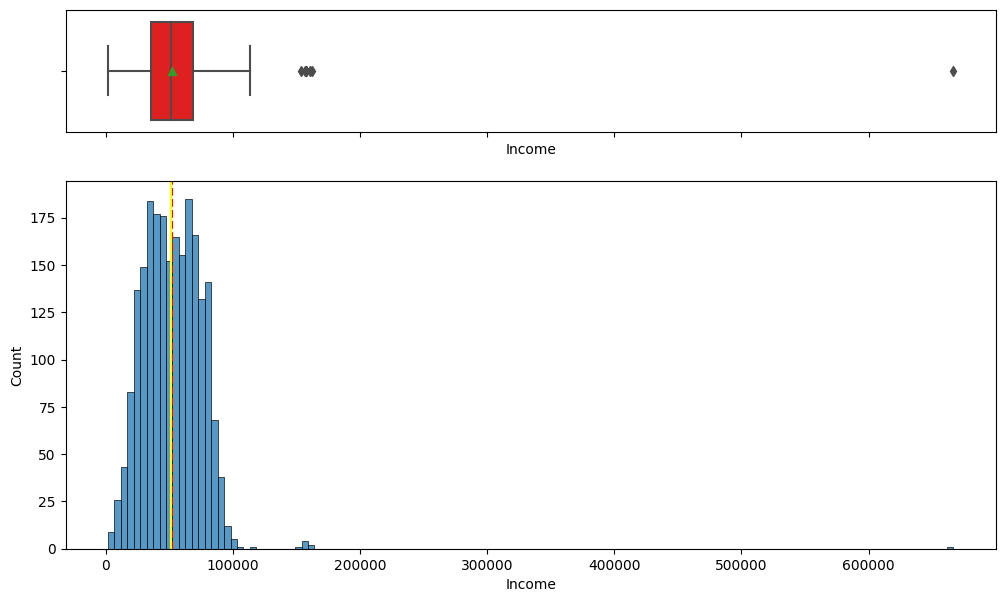

In [99]:
# observations on Income
histogram_boxplot(data, "Income")

In [100]:
# the DataFrame data for rows where the "Income" column values are greater than $200,000

#create a new DataFrame high_income_customers containing only the rows where the "Income" is greater than $200,000

high_income_customers = data[data["Income"] > 200000]
high_income_customers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Total_Amount_Spent
527,1977,Graduation,Married,666666.000,1,0,########,23,9,14,18,8,1,12,4,3,1,3,6,0,0,44,62


**Histogram and Boxplot**

The histogram and boxplot illustrate the distribution and central tendency of spending on meat products across the customer base. The boxplot displays key statistics like the median (line inside the box), upper and lower quartiles (box edges), and any outliers (points outside the whiskers).

For the "MntMeatProducts" variable:

The histogram shows the frequency distribution of spending on meat products.

The boxplot provides a visual summary of the data's spread, center, and any outliers.

This visualization allows us to grasp the variability in spending on meat products and identify potential outliers that fall significantly beyond the typical spending pattern across customers.

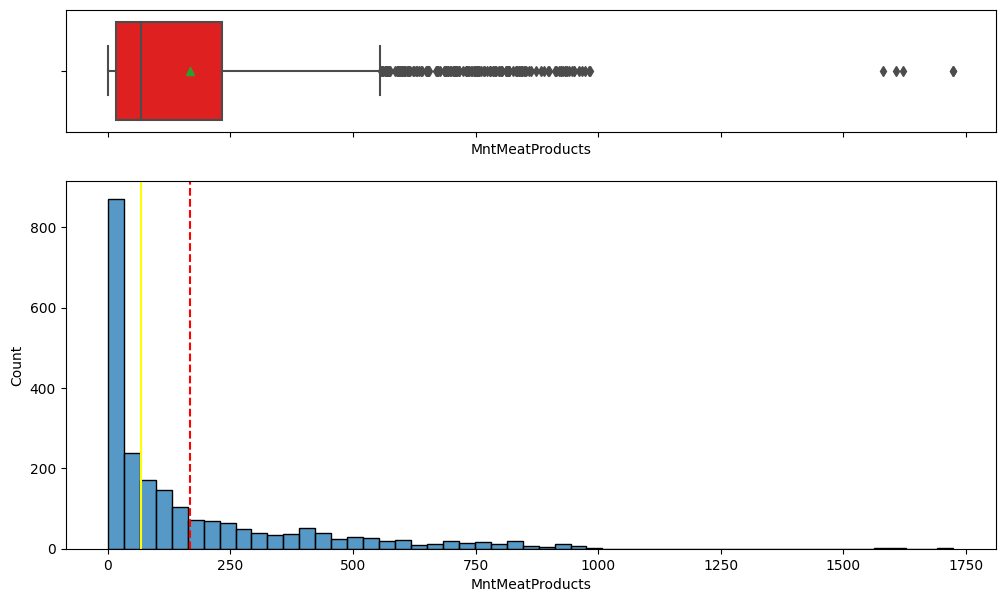

In [101]:
# observations on MntMeatProducts
histogram_boxplot(data, "MntMeatProducts")


**Observing the distribution of "NumWebVisitsMonth" with a histogram and boxplot**

In [102]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="yellow", linestyle="-"
    )


**Generate a boxplot and a histogram for the "NumWebVisitsMonth" variable, providing insights into its distribution, central tendency (mean and median), and variability**

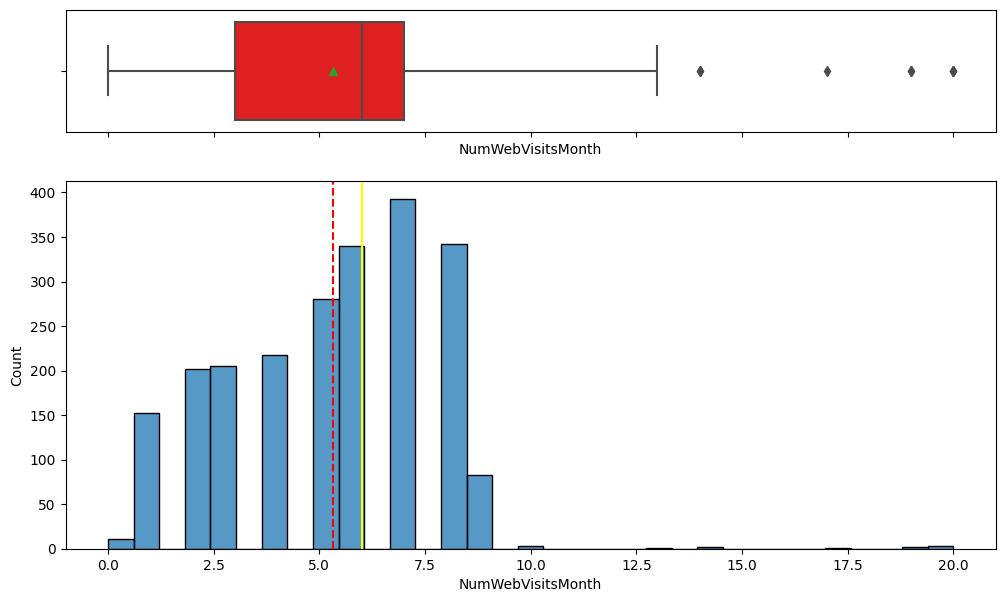

In [103]:
histogram_boxplot(data, "NumWebVisitsMonth")
plt.show()


In [104]:
# Filtering rows where NumCatalogPurchases is greater than 15
high_catalog_purchases = data[data["NumCatalogPurchases"] > 15]
high_catalog_purchases

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Total_Amount_Spent
325,1977,Graduation,Married,157146.000,0,0,4/29/2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,44,1730
497,1982,PhD,Married,160803.000,0,0,########,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,39,1717
961,1979,Graduation,Married,2447.000,1,0,########,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,42,1730
2204,1973,PhD,Married,157243.000,0,1,########,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,48,1608


**Visualization of boxplots**

In [105]:
# Selecting columns of interest
selected_columns = [
    "MntWines",
    "MntGoldProds",
    "MntMeatProducts",
    "MntFruits",
    "MntFishProducts",
    "MntSweetProducts",
]


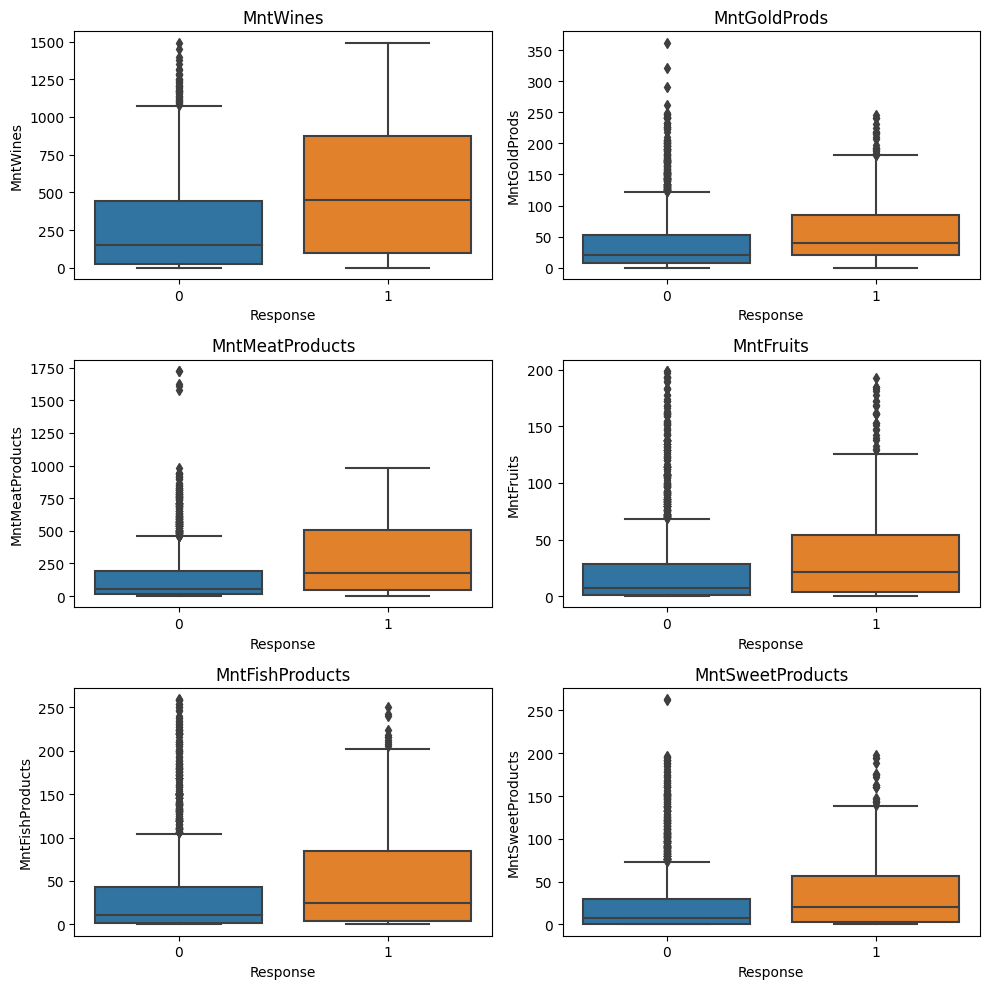

In [106]:

# Create a figure and axes for subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.flatten()  # Flatten the axes for iteration

# Loop through each variable and create a boxplot
for i, variable in enumerate(selected_columns):
    sns.boxplot(x=data["Response"], y=data[variable], ax=axs[i])  # Plot boxplot
    axs[i].set_title(variable)  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot


Visualize the relationship between the 'Income' and 'Total_Amount_Spent'.

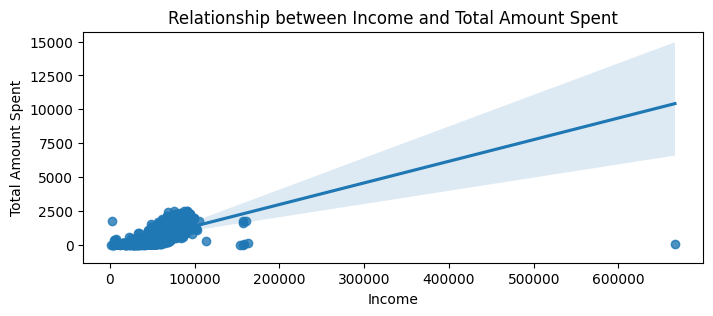

In [107]:
# creates a regression plot using Seaborn to visualize

plt.figure(figsize=(8, 3))
sns.regplot(x='Income', y='Total_Amount_Spent', data=data)

plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.title('Relationship between Income and Total Amount Spent')

plt.show()


In [108]:
# Create a copy of the 'data' DataFrame and store it in 'data1'
data1 = data.copy()


In [109]:
# Dropping specific columns from the DataFrame
columns_to_drop = ["Year_Birth", "Dt_Customer", "Total_Amount_Spent"]
data1.drop(columns=columns_to_drop, inplace=True)

In [110]:
# Separating target variable and other variables
X = pd.get_dummies(data1.drop(columns="Response"))
Y = data1["Response"]


In [111]:
# Splitting data into training, validation, and test sets
from sklearn.model_selection import train_test_split

# Splitting into temporary and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# Further splitting the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

# Printing the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}")


Training set shape: (1341, 25), Validation set shape: (448, 25), Test set shape: (448, 25)


In [112]:
# Importing SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# Creating an instance of SimpleImputer with 'median' strategy
imputer = SimpleImputer(strategy="median")


Missing values in the specified columns using the median and transforms the train, validation, and test datasets accordingly, ensuring consistency across all three sets.

In [113]:
# Impute missing values using median and transform train, validation, and test data
for dataset in [X_train, X_val, X_test]:
    dataset[X_train.columns] = imputer.fit_transform(dataset[X_train.columns])

Check for missing values in the training, validation, and test sets:

In [114]:
# Check for missing values in the train, validation, and test sets
missing_train = X_train.isnull().sum()
missing_val = X_val.isnull().sum()
missing_test = X_test.isnull().sum()

# Display the missing values count
print("Missing values in the training set:")
print(missing_train)
print("-" * 30)

print("Missing values in the validation set:")
print(missing_val)
print("-" * 30)

print("Missing values in the test set:")
print(missing_test)


Missing values in the training set:
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
Complain                   0
Age                        0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Widow       0
dtype: int64
------------------------------
Missing values in the validation set:
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits   

In [115]:
from sklearn.metrics import make_scorer, recall_score

# Creating a scorer for recall score
scorer = make_scorer(recall_score)


In [116]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute different metrics to evaluate classification model performance

    Parameters:
    model: classifier
    predictors: independent variables
    target: dependent variable

    Returns:
    df_perf: DataFrame of performance metrics
    """

    # Predict using the independent variables
    pred = model.predict(predictors)

    # Calculate metrics for evaluation
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # Create a DataFrame of metrics
    df_perf = pd.DataFrame({
        "Accuracy": acc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1,
    }, index=[0])

    return df_perf


In [117]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [118]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Cross-Validation performance on training dataset:

Bagging: 0.28
Random forest: 0.23000000000000004
GBM: 0.33999999999999997
Adaboost: 0.33
dtree: 0.4

Validation Performance:

Bagging: 0.26865671641791045
Random forest: 0.208955223880597
GBM: 0.26865671641791045
Adaboost: 0.26865671641791045
dtree: 0.3880597014925373


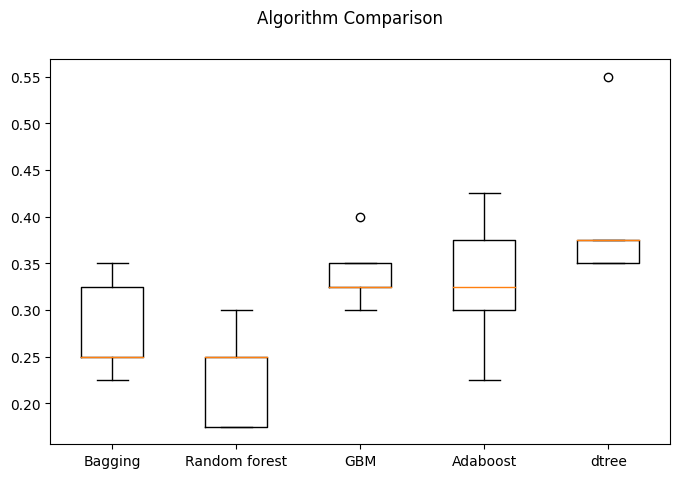

In [119]:
import matplotlib.pyplot as plt

# Create a figure and set its size
fig, ax = plt.subplots(figsize=(8, 5))

# Set the title for the comparison of algorithms
fig.suptitle("Algorithm Comparison")

# Create a boxplot for the results
ax.boxplot(results1)

# Set the labels for the x-axis based on algorithm names
ax.set_xticklabels(names)

# Show the plot
plt.show()

**Binomial distribution plot using Seaborn and NumPy**

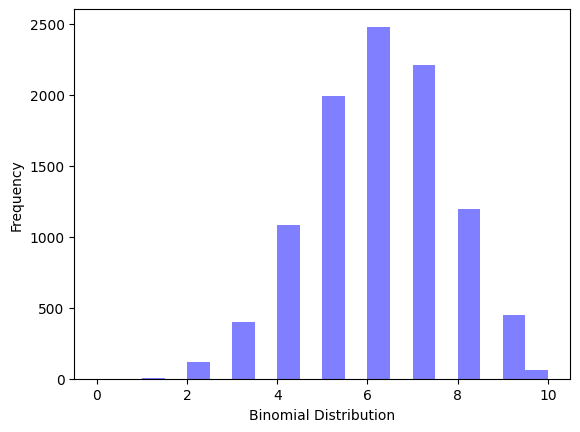

In [120]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set parameters for generating binomial distribution data
n_trials = 10  # Number of trials
probability = 0.6  # Probability of success in each trial

# Generate binomial distribution data
data = np.random.binomial(n_trials, probability, 10000)

# Plotting a histogram for the generated data
ax = sns.distplot(data,
                  bins=20,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth": 1, 'alpha': 0.5})

# Set labels for the plot
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

# Display the plot
plt.show()

 **Poisson distribution and plot a histogram**

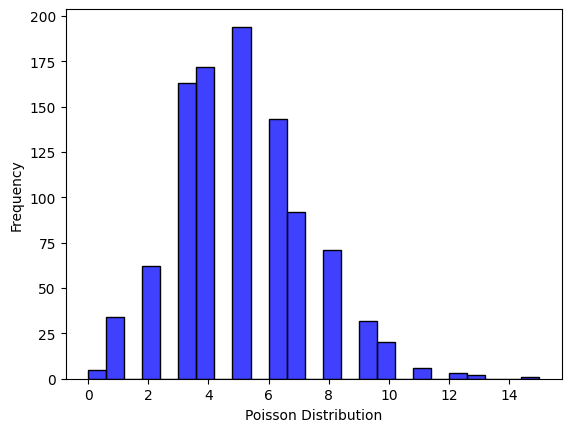

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate Poisson distribution data
poisson_data = np.random.poisson(lam=5, size=1000)

# Plot a histogram using Seaborn
sns.histplot(poisson_data, kde=False, color='blue')
plt.xlabel('Poisson Distribution')
plt.ylabel('Frequency')
plt.show()

**Calculate the probability density of a normal distribution**

In [122]:
import numpy as np

def normal_distribution_probability(x, mean, sd):
    """
    Calculate the probability density of a normal distribution.

    Arguments:
    x: Value for which the probability density needs to be calculated.
    mean: Mean of the normal distribution.
    sd: Standard deviation of the normal distribution.

    Returns:
    Probability density for the given value.
    """
    exponent = -0.5 * ((x - mean) / sd) ** 2
    prob_density = 1 / (np.sqrt(2 * np.pi) * sd) * np.exp(exponent)
    return prob_density

# Set the parameters
mean = 0
sd = 1
x = 1

# Calculate the probability density
result = normal_distribution_probability(x, mean, sd)
print(result)


0.24197072451914337


**Plot histogram along with the probability density function (PDF)**

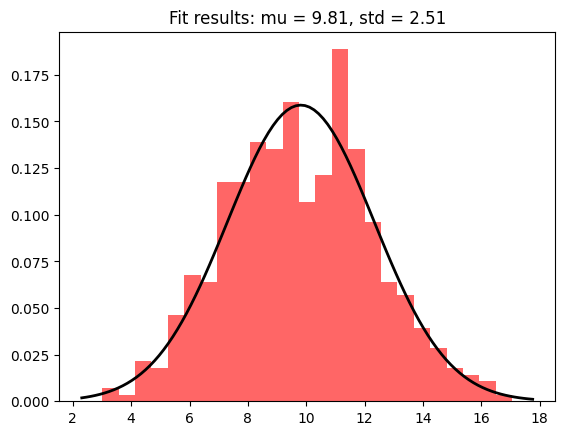

In [123]:
from scipy.stats import norm

# Generating random data from a normal distribution
data = norm.rvs(10.0, 2.5, size=500)

# Fitting a normal distribution to the data
mu, std = norm.fit(data)

# Plotting the histogram
plt.hist(data, bins=25, density=True, alpha=0.6, color='r')

# Creating x values for the PDF plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Calculating the probability density function (PDF) for the fitted normal distribution
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Adding title with the fitted mean (mu) and standard deviation (std)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)

plt.show()

**Conclusion**

"In this project, the dataset underwent crucial cleaning and preparation steps, ensuring data accuracy. Descriptive statistics offered key insights into customer behavior and demographics. While specific probability distributions weren't explicitly identified, further exploration may aid in understanding probabilities and expected values.

Analysis revealed distinctions in spending habits between customers who responded to marketing campaigns and those who didn't. To gain deeper insights and actionable recommendations, a more thorough analysis involving statistical tests and advanced machine learning models is suggested. This will help identify significant predictors of customer responses, refining marketing strategies for better outcomes."